In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
# define membership functions
def trapMem(x, params):
    mem = []
    a,b,c,d = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (c != d):
            term2 = (d - val) / (d - c)
        else: 
            term2 = 1
        if (a - 0.00001 <= val <= d + 0.00001):
            value = max(min(term1, term2, 1), 0)
        else:
            value = 0
        mem.append(value)
        # print(val, value)
    return mem

def gaussMem(x, params):
    mem = []
    sigma, c = np.r_[params]
    for val in x:
        term1 = -1 * ((val - c) ** 2)
        term2 = 2 * (sigma ** 2)
        value = np.e ** (term1 / term2)
        mem.append(value)
        # print(val, value)
    return mem

def trigMem(x, params):
    mem = []
    a,b,c = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (b != c):
            term2 = (c - val) / (c - b)
        else:
            term2 = 1
        if(val < a - 0.00001 or val > c + 0.00001):
            value = 0
        else:
            value = max(min(term1,term2), 0)
        mem.append(value)
        # print(val, value)
    return mem

def centroidDF(x, mf):
    sum = np.sum(mf)
    mfSum = np.sum(np.multiply(mf, x))
    return mfSum / sum

def imp_zadeh(x,y):
    return np.fmin( 1.0 , 1.0 - x + y )

def imp_cor_min(x,y):
    return np.fmin( x, y )

def imp_cor_prod(x,y):
    return np.multiply(x, y)

def implication(x,y,type):
    if (type == 0):
        return np.fmin(1.0, 1.0 - x + y)
    elif (type == 1):
        return np.fmin(x, y)
    elif (type == 2):
        return np.multiply(x, y)

# interpret membership
def interpMem(values, memFunc, x):
    lIndex = None
    for i in range(len(values)):
        if values[i] > x:
            lIndex = i - 1
            break
    
    if lIndex is None: #if the index is at the end of the array
        lIndex = len(values) - 2 # set to the second to last index 

    left = memFunc[lIndex]
    right = memFunc[lIndex + 1]

    leftWeight = (values[lIndex + 1] - x) / (values[lIndex + 1] - values[lIndex])
    rightWeight = 1 - leftWeight

    return (leftWeight * left) + (rightWeight * right)
    
def aggregate(rules, type):
    if (type == 0):
        return np.fmax.reduce(rules)
    if (type == 1):
        return sum(rules)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


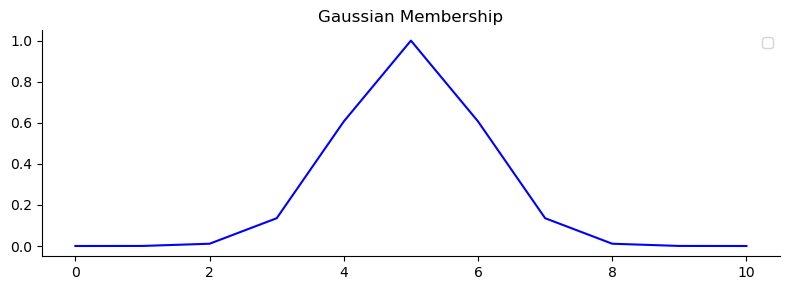

In [126]:
testDomain = np.arange(0, 10.1, 1)
test_mf = gaussMem(testDomain, [1, 5])


# visualize these universes and membership functions
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(testDomain, test_mf, 'b', linewidth=1.5, label='')
ax0.set_title('Gaussian Membership')
ax0.legend()


# turn off top/right axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()

In [127]:
print(testDomain)
print(test_mf)
test_level = interpMem(testDomain, test_mf, 6.7)
print(test_level)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[3.7266531720786735e-06, 0.00033546262790251196, 0.01110899653824231, 0.1353352832366127, 0.6065306597126334, 1.0, 0.6065306597126334, 0.1353352832366127, 0.01110899653824231, 0.00033546262790251196, 3.7266531720786735e-06]
0.27669389617941886


In [128]:
impOp = 2
print(implication(0, 0, impOp))
print(implication(1, 2, impOp))
print(implication(7, .5, impOp))
print(implication(-2, 0, impOp))
print(implication(-4, -4, impOp))
print(implication(-4, -6, impOp))

0
2
3.5
0
16
24


[3.7266531720786735e-06, 0.00033546262790251196, 0.01110899653824231, 0.1353352832366127, 0.6065306597126334, 1.0, 0.6065306597126334, 0.1353352832366127, 0.01110899653824231, 0.00033546262790251196, 3.7266531720786735e-06]
[0.60000745 0.60067093 0.62221799 0.87067057 1.60653066 2.
 1.60653066 0.87067057 0.62221799 0.60067093 0.60000745]
5.0


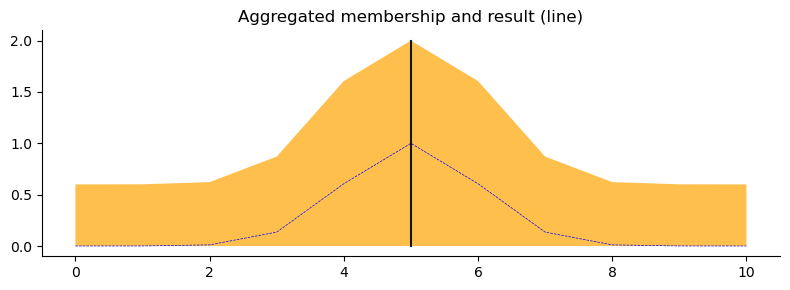

In [129]:
test_mf_1 = trigMem(testDomain, [2, 5, 6])
level_1 = interpMem(testDomain, test_mf_1, 5.6)
test_mf_2 = trapMem(testDomain, [1, 2, 5, 9])
level_2 = interpMem(testDomain, test_mf_2, 3.4)
test_mf_out = gaussMem(testDomain, [1, 5])

rules = []

rules.append(implication(level_1, test_mf_3, 0))
rules.append(implication(level_2, test_mf_3, 0))

# print(rules)

aggOp = 1
agg = aggregate(rules, aggOp)

print(test_mf_out)
print(agg)

output = centroidDF(testDomain, agg)
outputAct = interpMem(testDomain, agg, output)
output0 = np.zeros_like(testDomain)
print(output)


fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(testDomain, test_mf_out, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(testDomain, output0, agg, facecolor='Orange', alpha=0.7)
ax0.plot([output, output], [0,outputAct ], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()